# Ανάλυση Επιστημονικών Εργασιών για τον COVID-19

Σε αυτήν την πρόκληση, θα συνεχίσουμε με το θέμα της πανδημίας COVID και θα επικεντρωθούμε στην επεξεργασία επιστημονικών εργασιών σχετικά με το θέμα. Υπάρχει το [CORD-19 Dataset](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge) με περισσότερες από 7000 (τη στιγμή της συγγραφής) εργασίες για τον COVID, διαθέσιμες με μεταδεδομένα και περιλήψεις (και για περίπου τις μισές από αυτές παρέχεται επίσης πλήρες κείμενο).

Ένα πλήρες παράδειγμα ανάλυσης αυτού του συνόλου δεδομένων χρησιμοποιώντας την [Text Analytics for Health](https://docs.microsoft.com/azure/cognitive-services/text-analytics/how-tos/text-analytics-for-health/?WT.mc_id=academic-77958-bethanycheum) γνωστική υπηρεσία περιγράφεται [σε αυτήν την ανάρτηση ιστολογίου](https://soshnikov.com/science/analyzing-medical-papers-with-azure-and-text-analytics-for-health/). Θα συζητήσουμε μια απλοποιημένη εκδοχή αυτής της ανάλυσης.


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Λήψη Δεδομένων

Πρώτα, πρέπει να αποκτήσουμε τα μεταδεδομένα για τα έγγραφα CORD με τα οποία θα εργαστούμε.

**ΣΗΜΕΙΩΣΗ**: Δεν παρέχουμε αντίγραφο του συνόλου δεδομένων ως μέρος αυτού του αποθετηρίου. Ίσως χρειαστεί πρώτα να κατεβάσετε το αρχείο [`metadata.csv`](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge?select=metadata.csv) από [αυτό το σύνολο δεδομένων στο Kaggle](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge). Ενδέχεται να απαιτείται εγγραφή στο Kaggle. Μπορείτε επίσης να κατεβάσετε το σύνολο δεδομένων χωρίς εγγραφή [από εδώ](https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/historical_releases.html), αλλά θα περιλαμβάνει όλα τα πλήρη κείμενα εκτός από το αρχείο μεταδεδομένων.

Θα προσπαθήσουμε να αποκτήσουμε τα δεδομένα απευθείας από την online πηγή, ωστόσο, αν αυτό αποτύχει, θα χρειαστεί να κατεβάσετε τα δεδομένα όπως περιγράφεται παραπάνω. Επίσης, έχει νόημα να κατεβάσετε τα δεδομένα αν σκοπεύετε να πειραματιστείτε περαιτέρω με αυτά, για να εξοικονομήσετε χρόνο αναμονής.

> **ΣΗΜΕΙΩΣΗ** ότι το σύνολο δεδομένων είναι αρκετά μεγάλο, περίπου 1 Gb σε μέγεθος, και η παρακάτω γραμμή κώδικα μπορεί να χρειαστεί αρκετό χρόνο για να ολοκληρωθεί! (~5 λεπτά)


In [146]:
df = pd.read_csv("https://datascience4beginners.blob.core.windows.net/cord/metadata.csv.zip",compression='zip')
# df = pd.read_csv("metadata.csv")
df.head()

C:\winapp\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning:

Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.



cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  11667972   no-cc   
3  PMC59574  11686871   no-cc   
4  PMC59580  11686888   no-cc   

                                            abstract publish_time  \
0  OBJECTIVE: This retrospective chart review des...   2001-07-04   
1  Inflammatory diseases of the respiratory tract...   2000-08-15   
2  Surfactant protein-D (SP-D) participates in th...   2000-08-25   
3  Endothelin-1 (ET-1) is a 21 amino acid peptide...   2001-02-22   
4  Respiratory syncytial virus (RSV) and pneumoni...   2001-05-11   

                                             authors         journal  mag_id  \
0                Madani, Tariq A; Al-Ghamdi, Aisha A  BMC Infect Dis     NaN   
1  Vliet, Albert van der; Eiserich, Jason P; Cros...      Respir Res     NaN   
2                                    Crouch, Erika C      Respir Res     NaN   
3  Fagan, Karen A; McMurtry, Ivan F; Rodman, David M      Respir Res     NaN   
4  Domachowske, Joseph B; Bonville, Cynthia A; Ro...      Respir Res     NaN   

  who_covidence_id arxiv_id  \
0              NaN      NaN   
1              NaN      NaN   
2              NaN      NaN   
3              NaN      NaN   
4              NaN      NaN   

                                      pdf_json_files  \
0  document_parses/pdf_json/d1aafb70c066a2068b027...   
1  document_parses/pdf_json/6b0567729c2143a66d737...   
2  document_parses/pdf_json/06ced00a5fc04215949aa...   
3  document_parses/pdf_json/348055649b6b8cf2b9a37...   
4  document_parses/pdf_json/5f48792a5fa08bed9f560...   

                               pmc_json_files  \
0  document_parses/pmc_json/PMC35282.xml.json   
1  document_parses/pmc_json/PMC59543.xml.json   
2  document_parses/pmc_json/PMC59549.xml.json   
3  document_parses/pmc_json/PMC59574.xml.json   
4  document_parses/pmc_json/PMC59580.xml.json   

                                                 url  s2_id  
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...    NaN  
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
3  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
4  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN

Θα μετατρέψουμε τώρα τη στήλη ημερομηνίας δημοσίευσης σε `datetime` και θα σχεδιάσουμε το ιστόγραμμα για να δούμε το εύρος των ημερομηνιών δημοσίευσης.


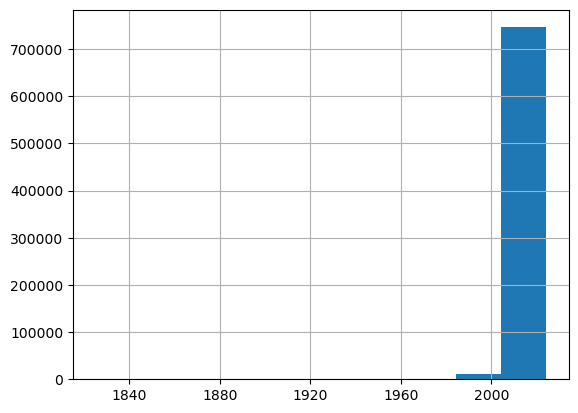

In [147]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_time'].hist()
plt.show()

## Εξαγωγή Δομημένων Δεδομένων

Ας δούμε τι είδους πληροφορίες μπορούμε να εξαγάγουμε εύκολα από περιλήψεις. Ένα πράγμα που μπορεί να μας ενδιαφέρει είναι να δούμε ποιες στρατηγικές θεραπείας υπάρχουν και πώς εξελίχθηκαν με την πάροδο του χρόνου. Για αρχή, μπορούμε να συντάξουμε χειροκίνητα τη λίστα των πιθανών φαρμάκων που χρησιμοποιούνται για τη θεραπεία του COVID, καθώς και τη λίστα των διαγνώσεων. Στη συνέχεια, τα εξετάζουμε και αναζητούμε αντίστοιχους όρους στις περιλήψεις των άρθρων.


In [148]:
medications = [
    'hydroxychloroquine', 'chloroquine', 'tocilizumab', 'remdesivir', 'azithromycin', 
    'lopinavir', 'ritonavir', 'dexamethasone', 'heparin', 'favipiravir', 'methylprednisolone']
diagnosis = [
    'covid','sars','pneumonia','infection','diabetes','coronavirus','death'
]

for m in medications:
    print(f" + Processing medication: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))
    
for m in diagnosis:
    print(f" + Processing diagnosis: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))

 + Processing medication: hydroxychloroquine
 + Processing medication: chloroquine
 + Processing medication: tocilizumab
 + Processing medication: remdesivir
 + Processing medication: azithromycin
 + Processing medication: lopinavir
 + Processing medication: ritonavir
 + Processing medication: dexamethasone
 + Processing medication: heparin
 + Processing medication: favipiravir
 + Processing medication: methylprednisolone
 + Processing diagnosis: covid
 + Processing diagnosis: sars
 + Processing diagnosis: pneumonia
 + Processing diagnosis: infection
 + Processing diagnosis: diabetes
 + Processing diagnosis: coronavirus
 + Processing diagnosis: death


Προσθέσαμε αρκετές στήλες στο dataframe μας που περιέχουν τον αριθμό των φορών που ένα συγκεκριμένο φάρμακο/διάγνωση εμφανίζεται στην περίληψη.

> **Σημείωση** ότι προσθέτουμε κενό στην αρχή της λέξης όταν ψάχνουμε για υποσυμβολοσειρά. Αν δεν το κάνουμε αυτό, μπορεί να έχουμε λανθασμένα αποτελέσματα, επειδή η *χλωροκίνη* θα βρεθεί επίσης μέσα στην υποσυμβολοσειρά *υδροξυχλωροκίνη*. Επίσης, αναγκάζουμε τη μετατροπή της στήλης των περιλήψεων σε `str` για να αποφύγουμε ένα σφάλμα - δοκιμάστε να αφαιρέσετε το `str` και δείτε τι συμβαίνει.

Για να κάνουμε την εργασία με τα δεδομένα πιο εύκολη, μπορούμε να εξάγουμε το υπο-πλαίσιο που περιέχει μόνο τις μετρήσεις φαρμάκων και να υπολογίσουμε τον συνολικό αριθμό εμφανίσεων. Αυτό μας δίνει το πιο δημοφιλές φάρμακο:


In [149]:
dfm = df[medications]
dfm = dfm.sum().reset_index().rename(columns={ 'index' : 'Name', 0 : 'Count'})
dfm.sort_values('Count',ascending=False)

Name  Count
0   hydroxychloroquine   9806
3           remdesivir   7861
2          tocilizumab   6118
1          chloroquine   4578
8              heparin   4161
5            lopinavir   3811
4         azithromycin   3585
7        dexamethasone   3340
9          favipiravir   2439
10  methylprednisolone   1600
6            ritonavir    948

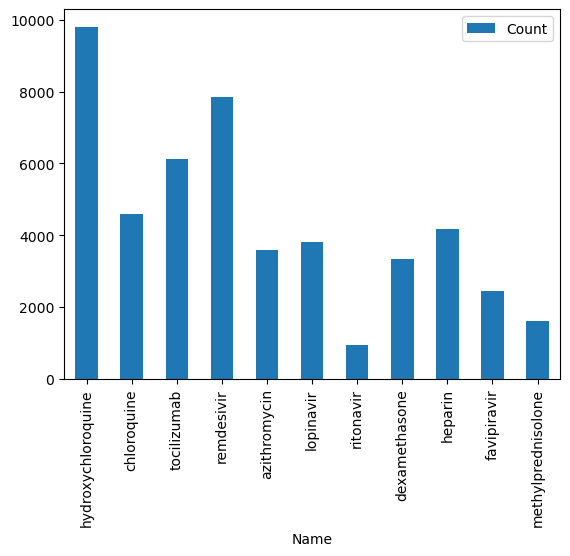

In [150]:
dfm.set_index('Name').plot(kind='bar')
plt.show()

## Αναζήτηση Τάσεων στη Στρατηγική Θεραπείας

Στο παραπάνω παράδειγμα έχουμε υπολογίσει το `sum` όλων των τιμών, αλλά μπορούμε να κάνουμε το ίδιο και σε μηνιαία βάση:


In [151]:
dfm = df[['publish_time']+medications].set_index('publish_time')
dfm = dfm[(dfm.index>="2020-01-01") & (dfm.index<="2021-07-31")]
dfmt = dfm.groupby([dfm.index.year,dfm.index.month]).sum()
dfmt

hydroxychloroquine  chloroquine  tocilizumab  \
publish_time publish_time                                                 
2020         1                           3672         1773         1779   
             2                              0           19            0   
             3                             45           72            5   
             4                            188          238           50   
             5                            459          191          158   
             6                            381          149          243   
             7                            381          178          202   
             8                            307          115          172   
             9                            319          123          185   
             10                           319           96          212   
             11                           272           66          170   
             12                           255          102          229   
2021         1                           2191          780         1787   
             2                            163           66          184   
             3                            172           85          190   
             4                            198           70          125   
             5                            141           55          138   
             6                            144           29          138   
             7                            112           49           96   

                           remdesivir  azithromycin  lopinavir  ritonavir  \
publish_time publish_time                                                   
2020         1                   2134          1173       1430        370   
             2                      3             3         18         11   
             3                     27            12         52         16   
             4                    124            68        113         13   
             5                    209           132        135         41   
             6                    186           110        132         18   
             7                    165           108        138         29   
             8                    165           145         91         24   
             9                    190            91         98         28   
             10                   227            72        127         39   
             11                   197            79        104         27   
             12                   271            98         76         31   
2021         1                   2523           892        841        198   
             2                    173            85         76          9   
             3                    295            87        100         17   
             4                    161            83         60         13   
             5                    179            69         55         21   
             6                    182            75         41         12   
             7                    270            64         59          5   

                           dexamethasone  heparin  favipiravir  \
publish_time publish_time                                        
2020         1                       561      984          666   
             2                         1        3           12   
             3                         3       21           11   
             4                        14       77           48   
             5                        12       92           48   
             6                        48       84           30   
             7                        58      117           56   
             8                        56       95           45   
             9                        90      111           46   
             10                       97      117           81   
             11                       77 

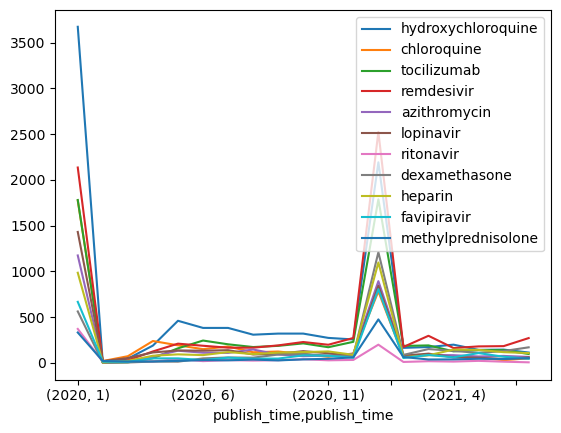

In [152]:
dfmt.plot()
plt.show()

Μια ενδιαφέρουσα παρατήρηση είναι ότι έχουμε μεγάλες αιχμές σε δύο σημεία: Ιανουάριος 2020 και Ιανουάριος 2021. Αυτό οφείλεται στο γεγονός ότι ορισμένα άρθρα δεν έχουν σαφώς καθορισμένη ημερομηνία δημοσίευσης και καταγράφονται ως Ιανουάριος του αντίστοιχου έτους.

Για να κατανοήσουμε καλύτερα τα δεδομένα, ας οπτικοποιήσουμε μόνο μερικά φάρμακα. Θα "διαγράψουμε" επίσης τα δεδομένα για τον Ιανουάριο και θα τα αντικαταστήσουμε με κάποια μέση τιμή, ώστε να δημιουργήσουμε ένα πιο ευπαρουσίαστο γράφημα:


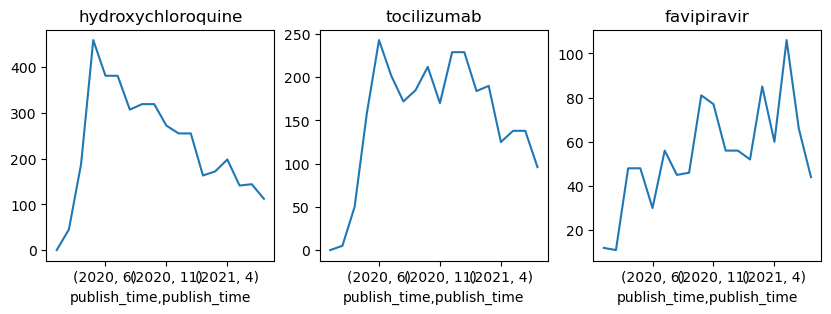

In [153]:
meds = ['hydroxychloroquine','tocilizumab','favipiravir']
dfmt.loc[(2020,1)] = np.nan
dfmt.loc[(2021,1)] = np.nan
dfmt.fillna(method='pad',inplace=True)
fig, ax = plt.subplots(1,len(meds),figsize=(10,3))
for i,m in enumerate(meds):
    dfmt[m].plot(ax=ax[i])
    ax[i].set_title(m)
plt.show()

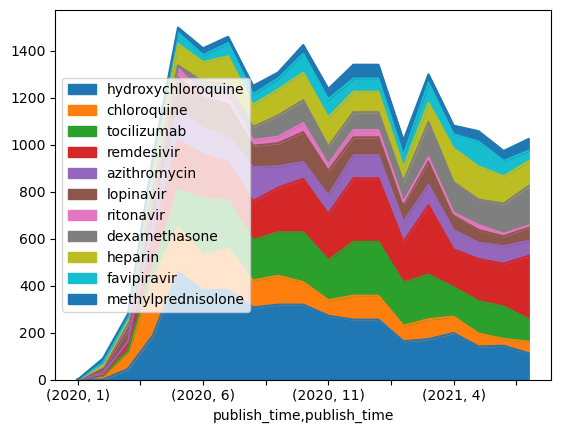

In [154]:
dfmt.plot.area()
plt.show()

Ακόμη περισσότερο, μπορούμε να υπολογίσουμε τη σχετική δημοτικότητα σε ποσοστά:


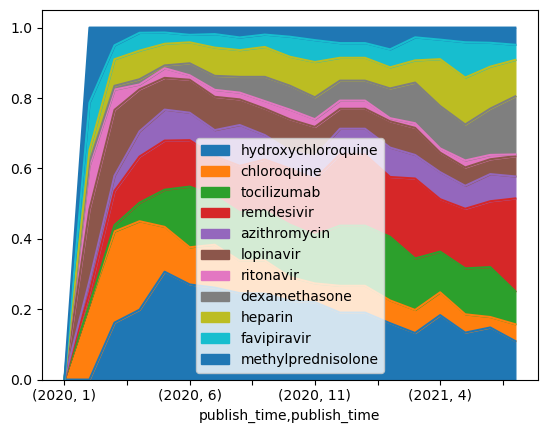

In [155]:
dfmtp = dfmt.iloc[:,:].apply(lambda x: x/x.sum(), axis=1)
dfmtp.plot.area()
plt.show()

## Υπολογισμός Αντιστοιχίας Φαρμάκων-Διαγνώσεων

Μία από τις πιο ενδιαφέρουσες σχέσεις που μπορούμε να εξετάσουμε είναι πώς διαφορετικές διαγνώσεις αντιμετωπίζονται με διαφορετικά φάρμακα. Για να το οπτικοποιήσουμε, πρέπει να υπολογίσουμε έναν **χάρτη συχνότητας συνύπαρξης**, ο οποίος θα δείχνει πόσες φορές δύο όροι αναφέρονται στο ίδιο άρθρο.

Ένας τέτοιος χάρτης είναι ουσιαστικά ένας δισδιάστατος πίνακας, που αναπαρίσταται καλύτερα με **numpy array**. Θα υπολογίσουμε αυτόν τον χάρτη περνώντας από όλες τις περιλήψεις και σημειώνοντας τις οντότητες που εμφανίζονται εκεί:


In [156]:
m = np.zeros((len(medications),len(diagnosis)))
for a in df['abstract']:
    x = str(a).lower()
    for i,d in enumerate(diagnosis):
        if ' '+d in x:
            for j,me in enumerate(medications):
                if ' '+me in x:
                    m[j,i] += 1

In [157]:
m

array([[4788., 2264.,  741., 2109.,  348., 2730.,  975.],
       [2111., 1238.,  231.,  998.,   79., 1394.,  364.],
       [2186.,  821.,  691., 1063.,  185., 1136.,  573.],
       [3210., 2191.,  522., 1538.,  160., 2191.,  622.],
       [1803.,  773.,  406.,  880.,  133.,  909.,  410.],
       [1982., 1102.,  379.,  885.,  113., 1366.,  370.],
       [ 504.,  356.,   83.,  259.,   23.,  354.,  106.],
       [1419.,  640.,  345.,  742.,  108.,  760.,  314.],
       [1537.,  678.,  330.,  782.,   93.,  826.,  301.],
       [ 967.,  634.,  201.,  431.,   44.,  656.,  136.],
       [ 660.,  336.,  293.,  385.,   53.,  452.,  148.]])

Ένας από τους τρόπους να οπτικοποιήσετε αυτήν τη μήτρα είναι να σχεδιάσετε ένα **heatmap**:


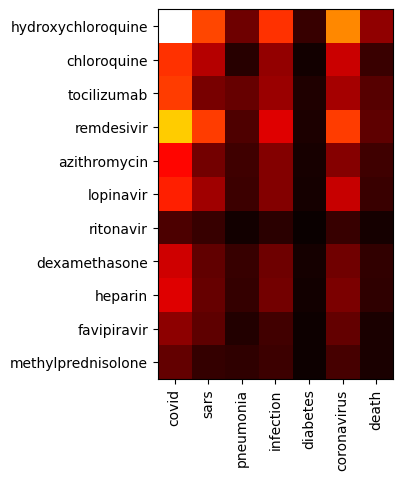

In [158]:
plt.imshow(m,interpolation='nearest',cmap='hot')
ax = plt.gca()
ax.set_yticks(range(len(medications))) 
ax.set_yticklabels(medications)
ax.set_xticks(range(len(diagnosis)))
ax.set_xticklabels(diagnosis,rotation=90)
plt.show()

Ωστόσο, ακόμα καλύτερη οπτικοποίηση μπορεί να γίνει χρησιμοποιώντας το διάγραμμα **Sankey**! Το `matplotlib` δεν διαθέτει ενσωματωμένη υποστήριξη για αυτόν τον τύπο διαγράμματος, οπότε θα χρειαστεί να χρησιμοποιήσουμε το [Plotly](https://plotly.com/python/) όπως περιγράφεται [σε αυτό το tutorial](https://plotly.com/python/sankey-diagram/).

Για να δημιουργήσουμε το διάγραμμα Sankey με το Plotly, πρέπει να κατασκευάσουμε τις ακόλουθες λίστες:
* Τη λίστα `all_nodes` με όλους τους κόμβους του γραφήματος, η οποία θα περιλαμβάνει τόσο τα φάρμακα όσο και τις διαγνώσεις
* Τη λίστα των δεικτών πηγής και προορισμού - αυτές οι λίστες θα δείχνουν ποιοι κόμβοι πηγαίνουν προς τα αριστερά και ποιοι προς τα δεξιά μέρος του διαγράμματος
* Τη λίστα όλων των συνδέσεων, κάθε σύνδεση αποτελούμενη από:
   - Δείκτη πηγής στον πίνακα `all_nodes`
   - Δείκτη προορισμού
   - Τιμή που υποδεικνύει τη δύναμη της σύνδεσης. Αυτή είναι ακριβώς η τιμή από τον πίνακα συν-εμφάνισης.
   - Προαιρετικά, χρώμα της σύνδεσης. Θα προσθέσουμε μια επιλογή για να τονίσουμε ορισμένους όρους για μεγαλύτερη σαφήνεια.

Ο γενικός κώδικας για τη δημιουργία του διαγράμματος Sankey είναι δομημένος ως ξεχωριστή συνάρτηση `sankey`, η οποία δέχεται δύο λίστες (κατηγορίες πηγής και προορισμού) και τον πίνακα συν-εμφάνισης. Επιπλέον, μας επιτρέπει να καθορίσουμε ένα όριο και να παραλείψουμε όλες τις συνδέσεις που είναι ασθενέστερες από αυτό το όριο - αυτό κάνει το διάγραμμα λίγο λιγότερο περίπλοκο.


In [160]:
import plotly.graph_objects as go

def sankey(cat1, cat2, m, treshold=0, h1=[], h2=[]):
    all_nodes = cat1 + cat2
    source_indices = list(range(len(cat1)))
    target_indices = list(range(len(cat1),len(cat1)+len(cat2)))

    s, t, v, c = [], [], [], []
    for i in range(len(cat1)):
        for j in range(len(cat2)):
            if m[i,j]>treshold:
                s.append(i)
                t.append(len(cat1)+j)
                v.append(m[i,j])
                c.append('pink' if i in h1 or j in h2 else 'lightgray')

    fig = go.Figure(data=[go.Sankey(
        # Define nodes
        node = dict(
        pad = 40,
        thickness = 40,
        line = dict(color = "black", width = 1.0),
        label =  all_nodes),

        # Add links
        link = dict(
        source =  s,
        target =  t,
        value =  v,
        color = c
    ))])
    fig.show()

sankey(medications,diagnosis,m,500,h2=[0])

## Συμπέρασμα

Έχετε δει ότι μπορούμε να χρησιμοποιήσουμε αρκετά απλές μεθόδους για να εξάγουμε πληροφορίες από μη δομημένες πηγές δεδομένων, όπως το κείμενο. Σε αυτό το παράδειγμα, χρησιμοποιήσαμε την υπάρχουσα λίστα φαρμάκων, αλλά θα ήταν πολύ πιο ισχυρό να χρησιμοποιήσουμε τεχνικές επεξεργασίας φυσικής γλώσσας (NLP) για την εξαγωγή οντοτήτων από κείμενο. Στο [αυτό το άρθρο](https://soshnikov.com/science/analyzing-medical-papers-with-azure-and-text-analytics-for-health/) περιγράφουμε πώς να χρησιμοποιήσετε υπηρεσίες cloud για την εξαγωγή οντοτήτων. Μια άλλη επιλογή θα ήταν η χρήση βιβλιοθηκών NLP της Python, όπως το [NLTK](https://www.nltk.org/) - μια προσέγγιση για την εξαγωγή πληροφοριών από κείμενο χρησιμοποιώντας το NLTK περιγράφεται [εδώ](https://www.nltk.org/book/ch07.html).


## Πρόκληση

Συνεχίστε την έρευνα για τα δεδομένα της μελέτης COVID σύμφωνα με τις παρακάτω γραμμές:

1. Δημιουργήστε έναν πίνακα συν-εμφάνισης για διαφορετικά φάρμακα και δείτε ποια φάρμακα εμφανίζονται συχνά μαζί (δηλαδή αναφέρονται σε μία περίληψη). Μπορείτε να τροποποιήσετε τον κώδικα για τη δημιουργία πίνακα συν-εμφάνισης για φάρμακα και διαγνώσεις.
1. Οπτικοποιήστε αυτόν τον πίνακα χρησιμοποιώντας θερμογραφική απεικόνιση (heatmap).
1. Ως επιπλέον στόχο, μπορείτε να δοκιμάσετε να οπτικοποιήσετε τη συν-εμφάνιση φαρμάκων χρησιμοποιώντας [διάγραμμα χορδών](https://en.wikipedia.org/wiki/Chord_diagram). [Αυτή η βιβλιοθήκη](https://pypi.org/project/chord/) μπορεί να σας βοηθήσει να σχεδιάσετε ένα διάγραμμα χορδών.
1. Ως άλλον επιπλέον στόχο, προσπαθήστε να εξάγετε τις δοσολογίες διαφορετικών φαρμάκων (όπως **400mg** στο *πάρτε 400mg χλωροκίνης καθημερινά*) χρησιμοποιώντας κανονικές εκφράσεις και να δημιουργήσετε ένα dataframe που δείχνει διαφορετικές δοσολογίες για διαφορετικά φάρμακα. **Σημείωση**: λάβετε υπόψη αριθμητικές τιμές που βρίσκονται σε κοντινή κειμενική απόσταση από το όνομα του φαρμάκου.



---

**Αποποίηση ευθύνης**:  
Αυτό το έγγραφο έχει μεταφραστεί χρησιμοποιώντας την υπηρεσία αυτόματης μετάφρασης [Co-op Translator](https://github.com/Azure/co-op-translator). Παρόλο που καταβάλλουμε προσπάθειες για ακρίβεια, παρακαλούμε να έχετε υπόψη ότι οι αυτοματοποιημένες μεταφράσεις ενδέχεται να περιέχουν σφάλματα ή ανακρίβειες. Το πρωτότυπο έγγραφο στη μητρική του γλώσσα θα πρέπει να θεωρείται η αυθεντική πηγή. Για κρίσιμες πληροφορίες, συνιστάται επαγγελματική ανθρώπινη μετάφραση. Δεν φέρουμε ευθύνη για τυχόν παρεξηγήσεις ή εσφαλμένες ερμηνείες που προκύπτουν από τη χρήση αυτής της μετάφρασης.
